# Phase 1 – Module 8, basic Python and Statistics Capstone Project
## Analysis of Airline Delays and cancellations
#### By Nagendra Prasad

## Background:
### The Airline Arrival and Departure data obtained from Kaggle is for the year 2008. Coding and graphing in Python and Pandas is used to analyze the data.

## Executive Summary:
### There is a common notion that flights are delayed frequently. It is also a common belief that security and weather delays often play a major part in overall delay of flights. This project attempts to analyze the data in the above file and challenge the above notions. The project also attempts to compare the performance of major airlines.
### While extensive analysis is possible about various aspects of the operation and performance, this exercise will focus on:
### •	What is the 75th and 90th percentile delay in flights during the year 2008? Is the delay in most of the flights due to airlines themselves or a function of airports involved?
### •	What are the major causes of cancellation of flights? Are some airlines more prone to cancellation than other airlines?
### •	While considering flights delayed by an hour or more, are some airlines affected more than others?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Source Data:
The source file is about 650 MB in size, with more than 7 million rows. It was saved as a csv file and numpy  pandas and matplotlib extensions of Python were used in the analysis.It contains data for about 7 million flights from 20 airlines with a fleet size of about 5000. The Airlines collectively flew for nearly a billion minutes (873 million to be accurate). These airlines fly between about 300+ domestic airports.

#### Year: 2008
#### Month: 1-12
#### DayofMonth: 1-31
#### DayOfWeek: 1 (Monday) - 7 (Sunday)
#### DepTime: actual departure time (local, hhmm)
#### CRSDepTime: scheduled departure time (local, hhmm)
#### ArrTime: actual arrival time (local, hhmm)
#### CRSArrTime: scheduled arrival time (local, hhmm)
#### UniqueCarrier: unique carrier code
#### FlightNum: flight number
#### TailNum: plane tail number
#### ActualElapsedTime: in minutes
#### CRSElapsedTime: in minutes
#### AirTime: in minutes
#### ArrDelay: arrival delay, in minutes
#### DepDelay: departure delay, in minutes
#### Origin: origin IATA airport code
#### Dest: destination IATA airport code
#### Distance: in miles
#### TaxiIn: taxi in time, in minutes
#### TaxiOut: taxi out time in minutes
#### Cancelled: was the flight cancelled?
#### CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
#### Diverted: 1 = yes, 0 = no
#### CarrierDelay: in minutes
#### WeatherDelay: in minutes
#### NASDelay: in minutes
#### SecurityDelay: in minutes
#### LateAircraftDelay: in minutes

#### While most of the fields are self-explanatory, the Delay fields need some clarification as indicated below:

#### 1. Carrier Delay
Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are as follows:  aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

#### 2. NAS Delay
Delay that is within the control of the National Airspace System (NAS) may include non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are reported through OPSNET.

#### 3. Security Delay
Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

#### 4. Late Aircraft Delay
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


In [2]:
df= pd.read_csv('2008_1.csv')

In [3]:
df.shape

(7009728, 29)

In [4]:
# The following adds two columns to compute the total delay as well as the time from gate to gate

df['TotDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

df['TimeInMotion']= df['AirTime'] + df['TaxiIn'] + df['TaxiOut']

In [5]:
# The following code wrangles the data by replacing null values with zeros

df.fillna(0.0,inplace=True)

In [6]:
# show some basic stats regarding the data
print(" Unique Airlines" , len(df.UniqueCarrier.unique()) ,"\t\t\n", "Total Number of Flights", len(df.FlightNum.unique()),"\n", "Total Number of Unique Planes" , len(df.TailNum.unique()),"\n", "Total Number of Originating Airports" ,len(df.Origin.unique()),"\n", "Total Number of Destination Airports" ,len(df.Dest.unique()))

 Unique Airlines 20 		
 Total Number of Flights 7539 
 Total Number of Unique Planes 5374 
 Total Number of Originating Airports 303 
 Total Number of Destination Airports 304


In [7]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay,TimeInMotion
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-22.0,128.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-17.0,128.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,96.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-2.0,88.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,0,0,2.0,0.0,0.0,0.0,32.0,0.0,90.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-14.0,101.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0,0,0,10.0,0.0,0.0,0.0,47.0,-10.0,240.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-17.0,233.0
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-16.0,79.0


## 1. The following Analysis is to determine is specific Airlines, Originating Airport or Destination Airport are the cause of considerable delay.

In [8]:
# The following creates two Data Frames one computing the 75th percentiles of total delay by airline and another computing 
# 90th percentile of the total delay for each airline

df_al_stat =df[['UniqueCarrier','TotDelay']]

df_al_stat_90 = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').quantile(.90).reset_index().sort_values('TotDelay'))
df_al_stat_75 = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').quantile(.75).reset_index().sort_values('TotDelay'))

# The two Data Frames are merged together into one DataFrame
df_al_merged = pd.DataFrame(pd.merge(df_al_stat_75,df_al_stat_90,on = 'UniqueCarrier'))

In [9]:
# The above shows statistics by airline. However, since the data is by airline codes, it is helpful to decode. 
# The cross reference of airline codes and names is loaded into df_al DataFrame

airline_series = np.array([
    ['1D','Radixx'],['9E','Pinnacle'],['AA','American'],['AQ','Aloha'],['AS','Alaska'],['B6','JetBlue'],['BB','Seaborne'],['CO','Continental'],['DL','Delta'],['EV','ExpressJet'],['F9','Frontier'],['FL','AirTran'],['HA','Hawaiian'],['MQ','American Eagle'],['NW','Northwest'],['OH','Comair'],['OO','SkyWest'],['UA','United'],['US','US Airways'],['WN','Southwest'],['XE','Jet Suite X'],['YV','Mesa']
])
df_al = pd.DataFrame(airline_series, columns=['UniqueCarrier','Airline'])

In [10]:
# The following code merges the cross reference DataFrame with df_al and renames teh columns to appropriate names


df_Carrier_stat = pd.DataFrame((pd.merge(df_al, df_al_merged, on='UniqueCarrier')))
df_Carrier_stat.rename(columns={'TotDelay_x': '75th percentile','TotDelay_y': '90th percentile'}, inplace=True)

# The Data Frames are sorted

df_Carrier_stat_by75 = df_Carrier_stat.sort_values('75th percentile')

df_Carrier_stat_by90 = df_Carrier_stat.sort_values('90th percentile')

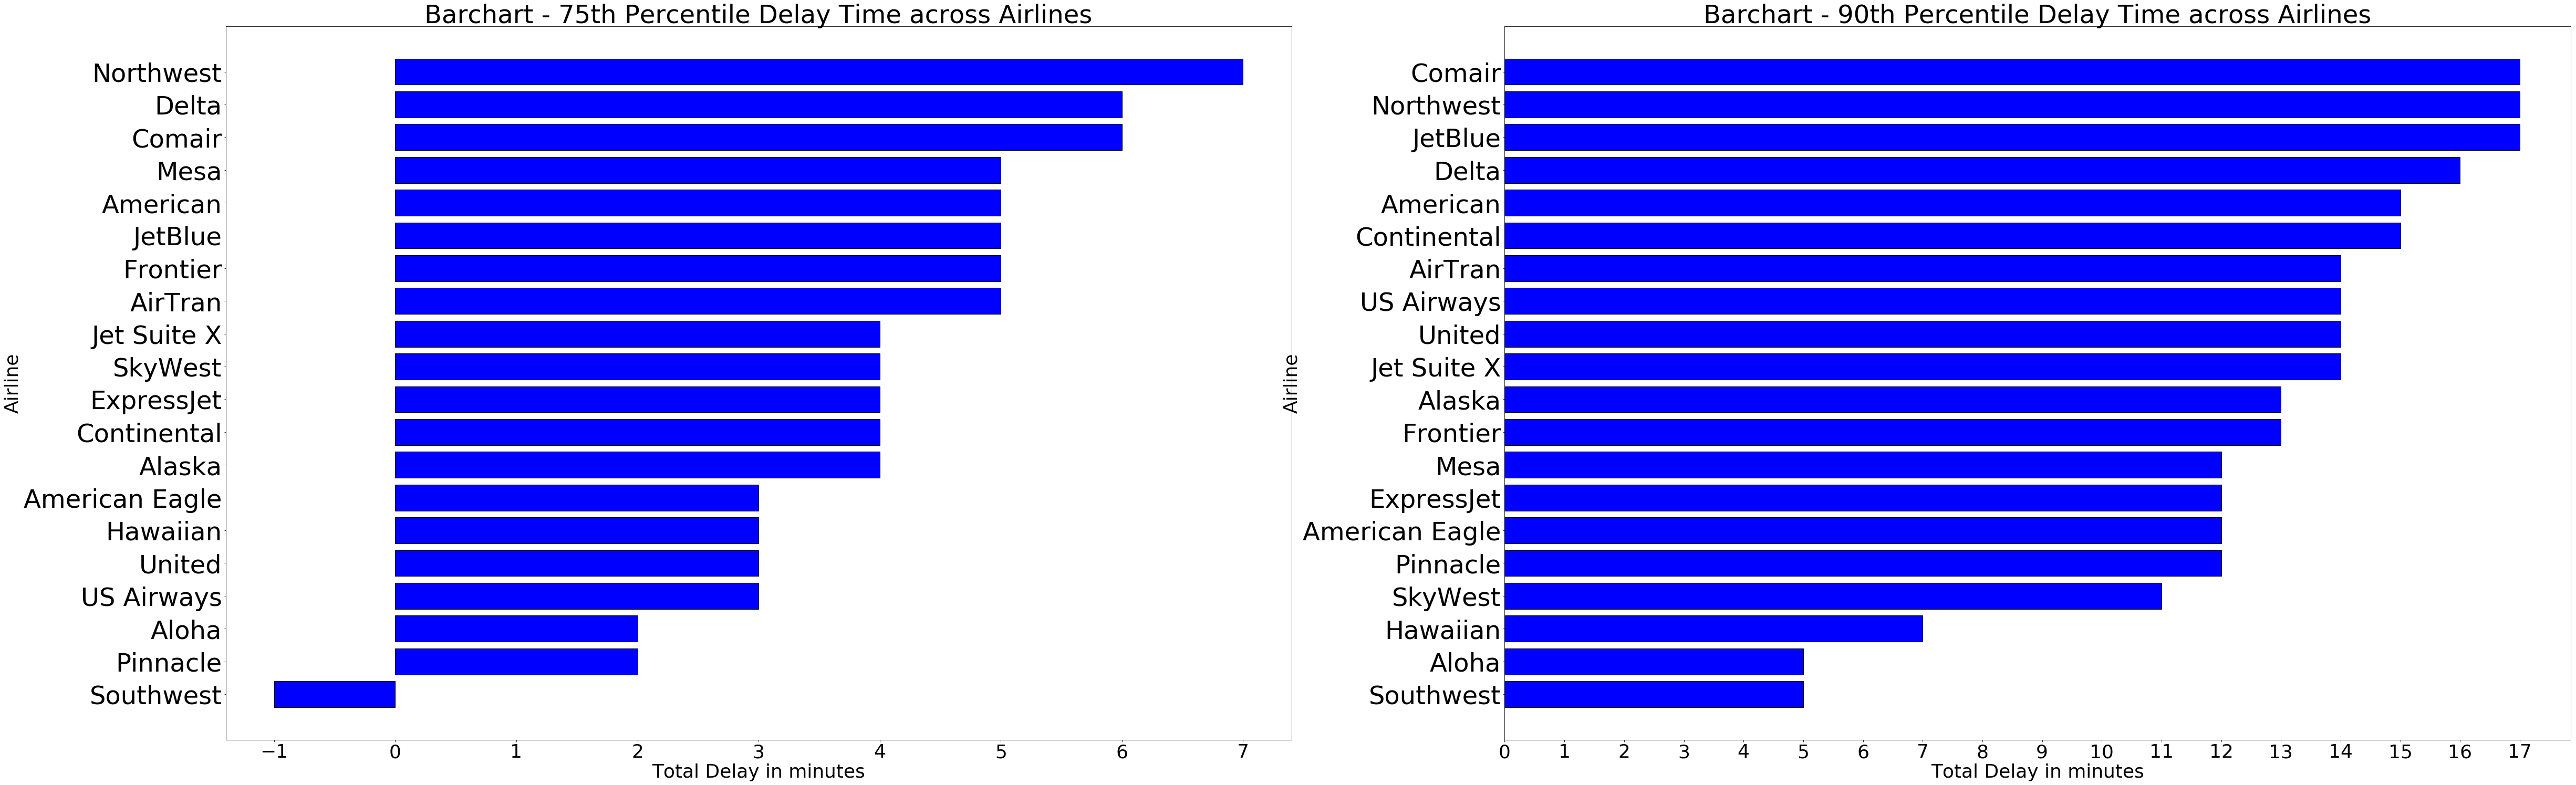

In [11]:
plt.figure(figsize=(80, 25))
Airlines=df_Carrier_stat_by75['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
Delay_in_minutes=df_Carrier_stat_by75['75th percentile']
xpos = np.arange(min(Delay_in_minutes),max(Delay_in_minutes)+1,1)
 
plt.subplot(1,2,1) 

plt.barh(pos,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Airlines',fontsize=48)


Airlines=df_Carrier_stat_by90['Airline']
ypos = np.arange(len(Airlines))
Delay_in_minutes=df_Carrier_stat_by90['90th percentile']
xpos = np.arange(0,max(Delay_in_minutes)+1,1)
 
plt.subplot(1,2,2)
plt.barh(pos,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Airlines',fontsize=48)
plt.show()

#### Looking at the graph, surprisingly  75% of the flights for any airline are delayed at most by 7 minutes! So, by and large the flights are on time. Southwest wins by being the only airline for which 75% of the flights are early by a minute or more! 
####  Also 90% of the flights for any airline are delayed at most by 17 minutes! So, by and large the flights are on time. Southwest wins again by being one of the the only two airlines where 90% of the flights are mere 5 minutes late!

There are several ways to rank the airlines. If we were to use the fleet size as the criteria, American, American Eagle, Delta, Southwest and United can be considered as major airlines in 2008. It is interesting to note that Southwest although biggest in fleet size next to American, behaves in a nimble fashion like one of the smaller airlines such as Aloha, Hawaiian or Pinnacle.

Comparable Airlines such as Delta and American perform at the other end of the spectrum.

In [12]:
# The following creates two Data Frames one computing the 75th percentiles of total delay by originating airport and another
# computing 90th percentile of the total delay by originating airport

df_O_TotDelay_90 = pd.DataFrame(df.groupby('Origin')['TotDelay'].quantile(.90).reset_index().sort_values('TotDelay'))
df_O_TotDelay_75 = pd.DataFrame(df.groupby('Origin')['TotDelay'].quantile(.75).reset_index().sort_values('TotDelay'))

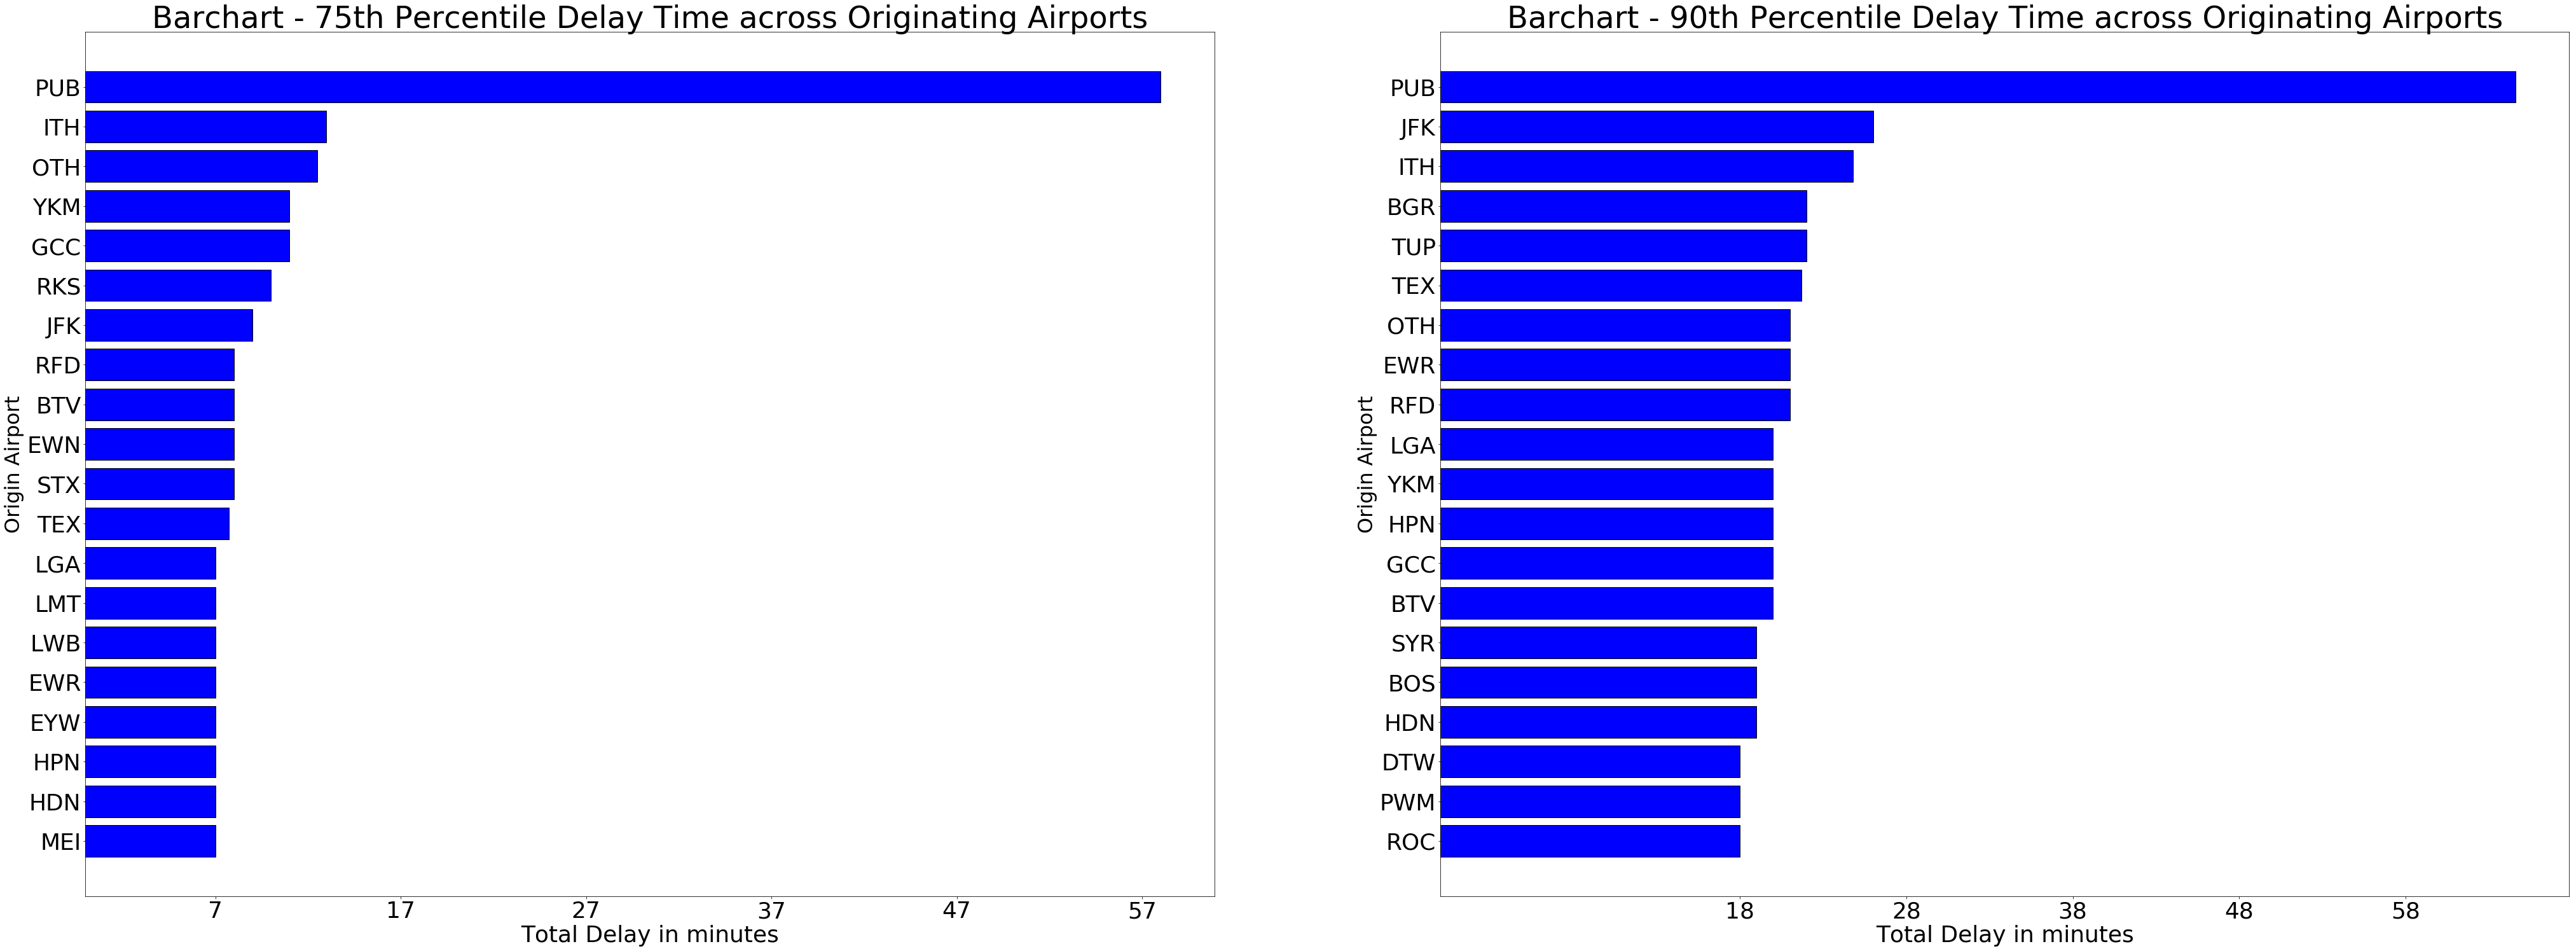

In [13]:
plt.figure(figsize=(70, 25))

Airports=df_O_TotDelay_75['Origin'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_O_TotDelay_75['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),10)

plt.subplot(1,2,1)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Origin Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Originating Airports',fontsize=48)

Airports=df_O_TotDelay_90['Origin'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_O_TotDelay_90['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),10)

plt.subplot(1,2,2)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Origin Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Originating Airports',fontsize=48)
plt.show()


#### Similar question on whether a particluar originating airport could be the reason for delayed flights shows according to the above graph, that except for a handful of airports(out of 300+), in all other cases 75% of the flights were less than 10 minutes late. Also except for a handful of airports(out of 300+), in all other cases 90% of the flights were less than 20 minutes late.
Pueblo Airport CO, Ithaca NY, Southwest Oregon Airport(OTH), Yakima WA, JFK, Bangor ME - some of these smaller airports(except JFK) seem to be the major contributors of delay.

In [14]:
# The following creates two Data Frames one computing the 75th percentiles of total delay by destination airport and another
# computing 90th percentile of the total delay by destination airport

df_D_TotDelay_90 = pd.DataFrame(df.groupby('Dest')['TotDelay'].quantile(.90).reset_index().sort_values('TotDelay'))
df_D_TotDelay_75 = pd.DataFrame(df.groupby('Dest')['TotDelay'].quantile(.75).reset_index().sort_values('TotDelay'))

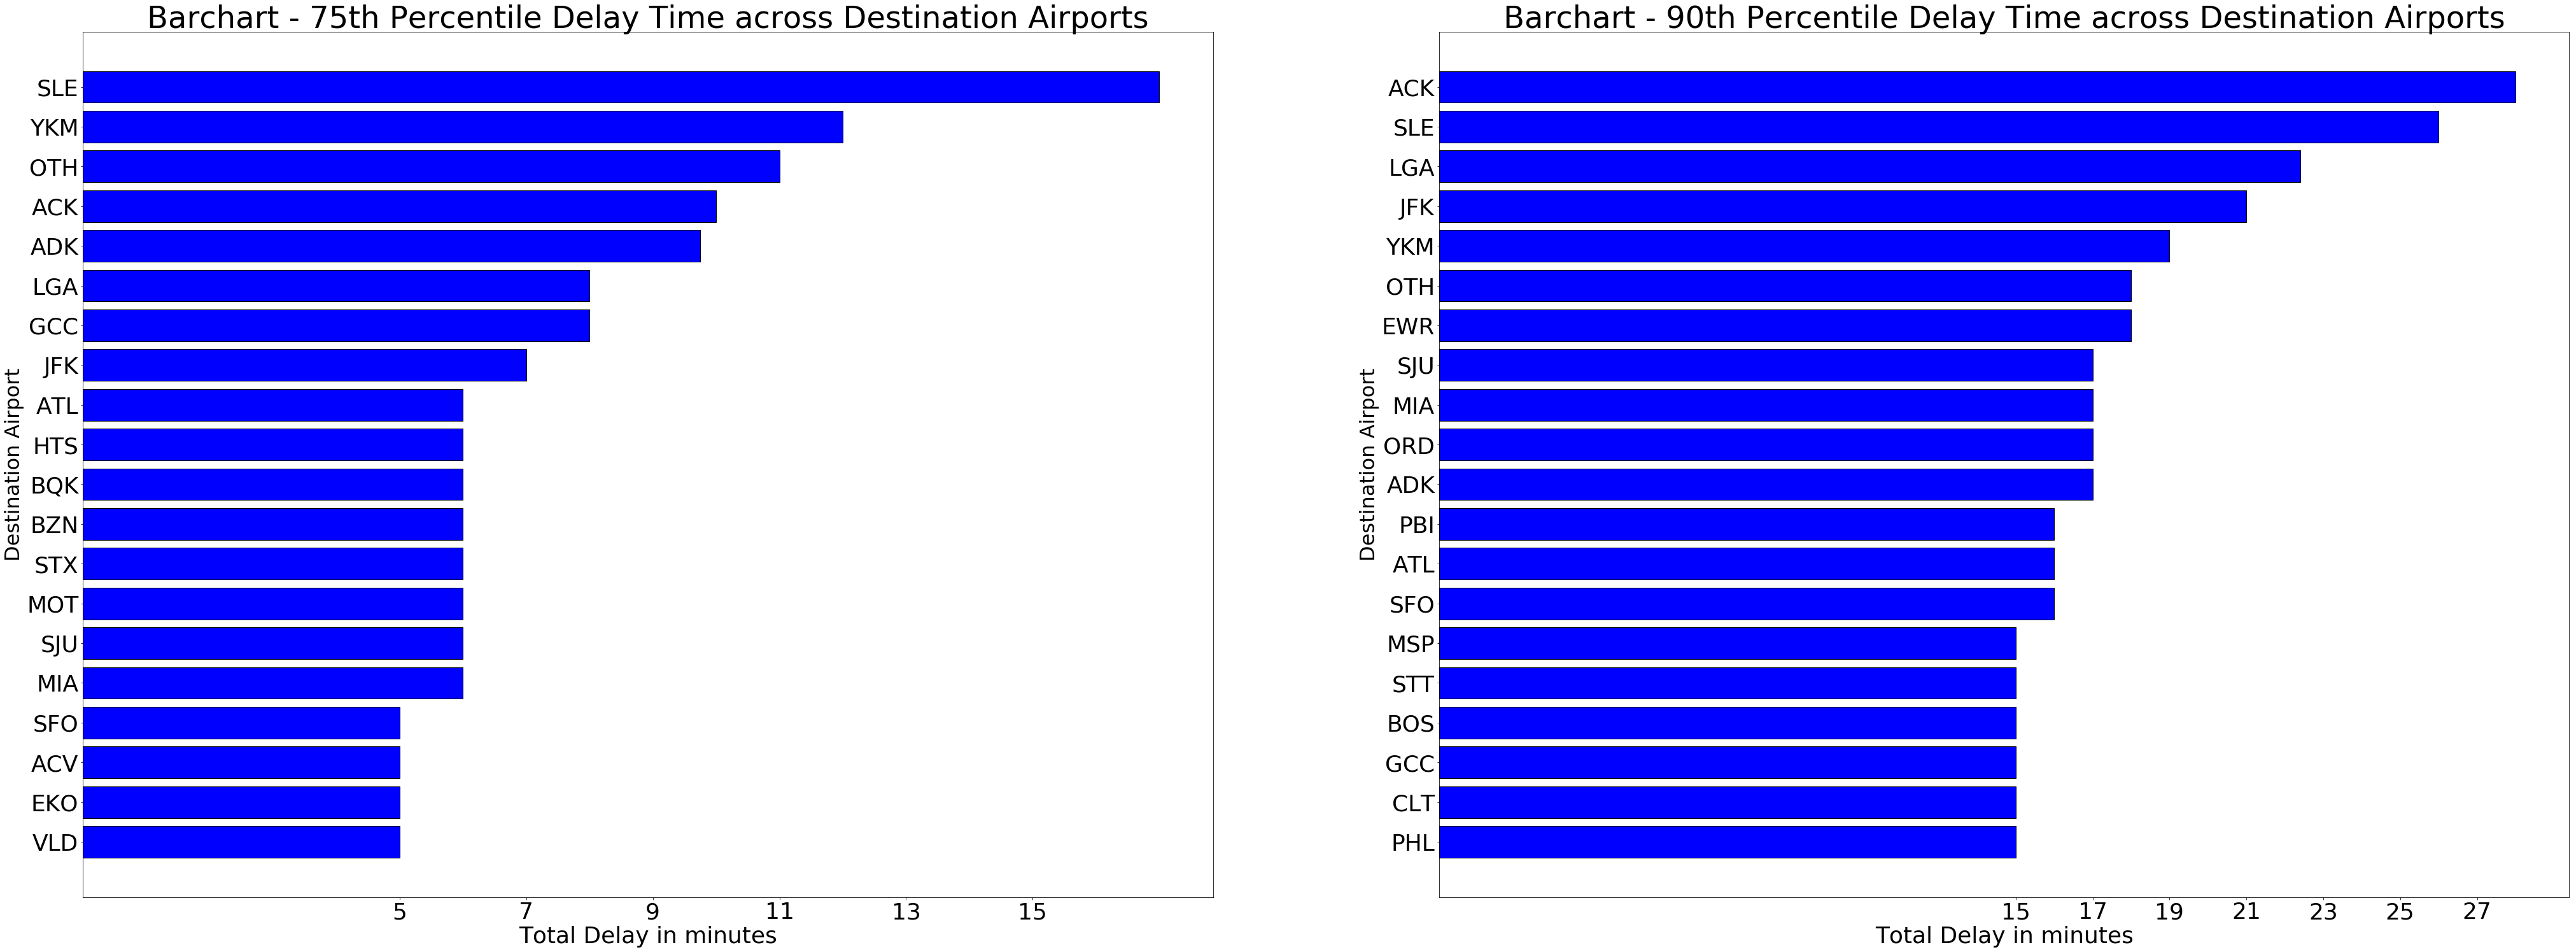

In [15]:
plt.figure(figsize=(70, 25))

Airports=df_D_TotDelay_75['Dest'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_D_TotDelay_75['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),2)

plt.subplot(1,2,1)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Destination Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Destination Airports',fontsize=48)

Airports=df_D_TotDelay_90['Dest'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_D_TotDelay_90['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),2)

plt.subplot(1,2,2)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Destination Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Destination Airports',fontsize=48)
plt.show()

#### Similar question on whether a particluar destination airport could be the reason for delayed flights shows according to the above graph, that except for a handful of airports(out of 300+), in all other cases 75% of the flights were less than 10 minutes late.
#### Also, except for a handful of airports(out of 300+), in all other cases 90% of the flights were less than 15 minutes late.
Salem municipal airport, Yakima WA, Southwest Oregon Airport, Nantucket MA - these smaller airports alongwith JFK, LGA and EWR seem to be contributing to the delay.

## So, we can conclude that most flights were less than 15 minutes late and were not affected by the airline, originating or destination airports.

## 2. The following analysis tries to figure out if a particular airline is more prone to cancellation than others

In [16]:
# df_cancelled DataFrame is a slice of cancelled flights from the main data file. df_cancelled_trunc slices a couple of 
# columns from the dataset to compare with the total flights from df_al_stat_trunc

# Computes the count of flights cancelled by airline code
cancelled_flight = df['Cancelled'] == 1
df_cancelled = pd.DataFrame(df[cancelled_flight].groupby('UniqueCarrier').count().reset_index())
df_cancelled.rename(columns={'Year': 'cancel_count'}, inplace=True)

# eliminate all other columns except for airline code and cancel count
df_cancelled_trunc = df_cancelled[['UniqueCarrier','cancel_count']]
###############################
# Computes the count of total flights by airline
df_al_stat_grp = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').count().reset_index())

df_al_stat_grp.rename(columns={'TotDelay': 'total_count'}, inplace=True)
# eliminate all other columns except for airline code and total count
df_al_stat_trunc = df_al_stat_grp[['UniqueCarrier','total_count']]
#####################################
# Computes the cancellation percentage by airline by:
# 1. Merging cancelled count and total count dataframes by unique carrier code
# 2. Calculating the percetage by dividing cancelled by total count and multiplying by 100
# 3. Merging above dataframe with airline cross reference dataframe

pd_cancelled_stat = pd.DataFrame(pd.merge(df_cancelled_trunc, df_al_stat_trunc))

pd_cancelled_stat['Perc'] = round((pd_cancelled_stat['cancel_count']/pd_cancelled_stat['total_count'])*100,2)

pd_cancelled_stat_by_airline= pd.DataFrame(pd.merge(pd_cancelled_stat,df_al,on='UniqueCarrier').sort_values(['Perc'],ascending=[False]))
#########################

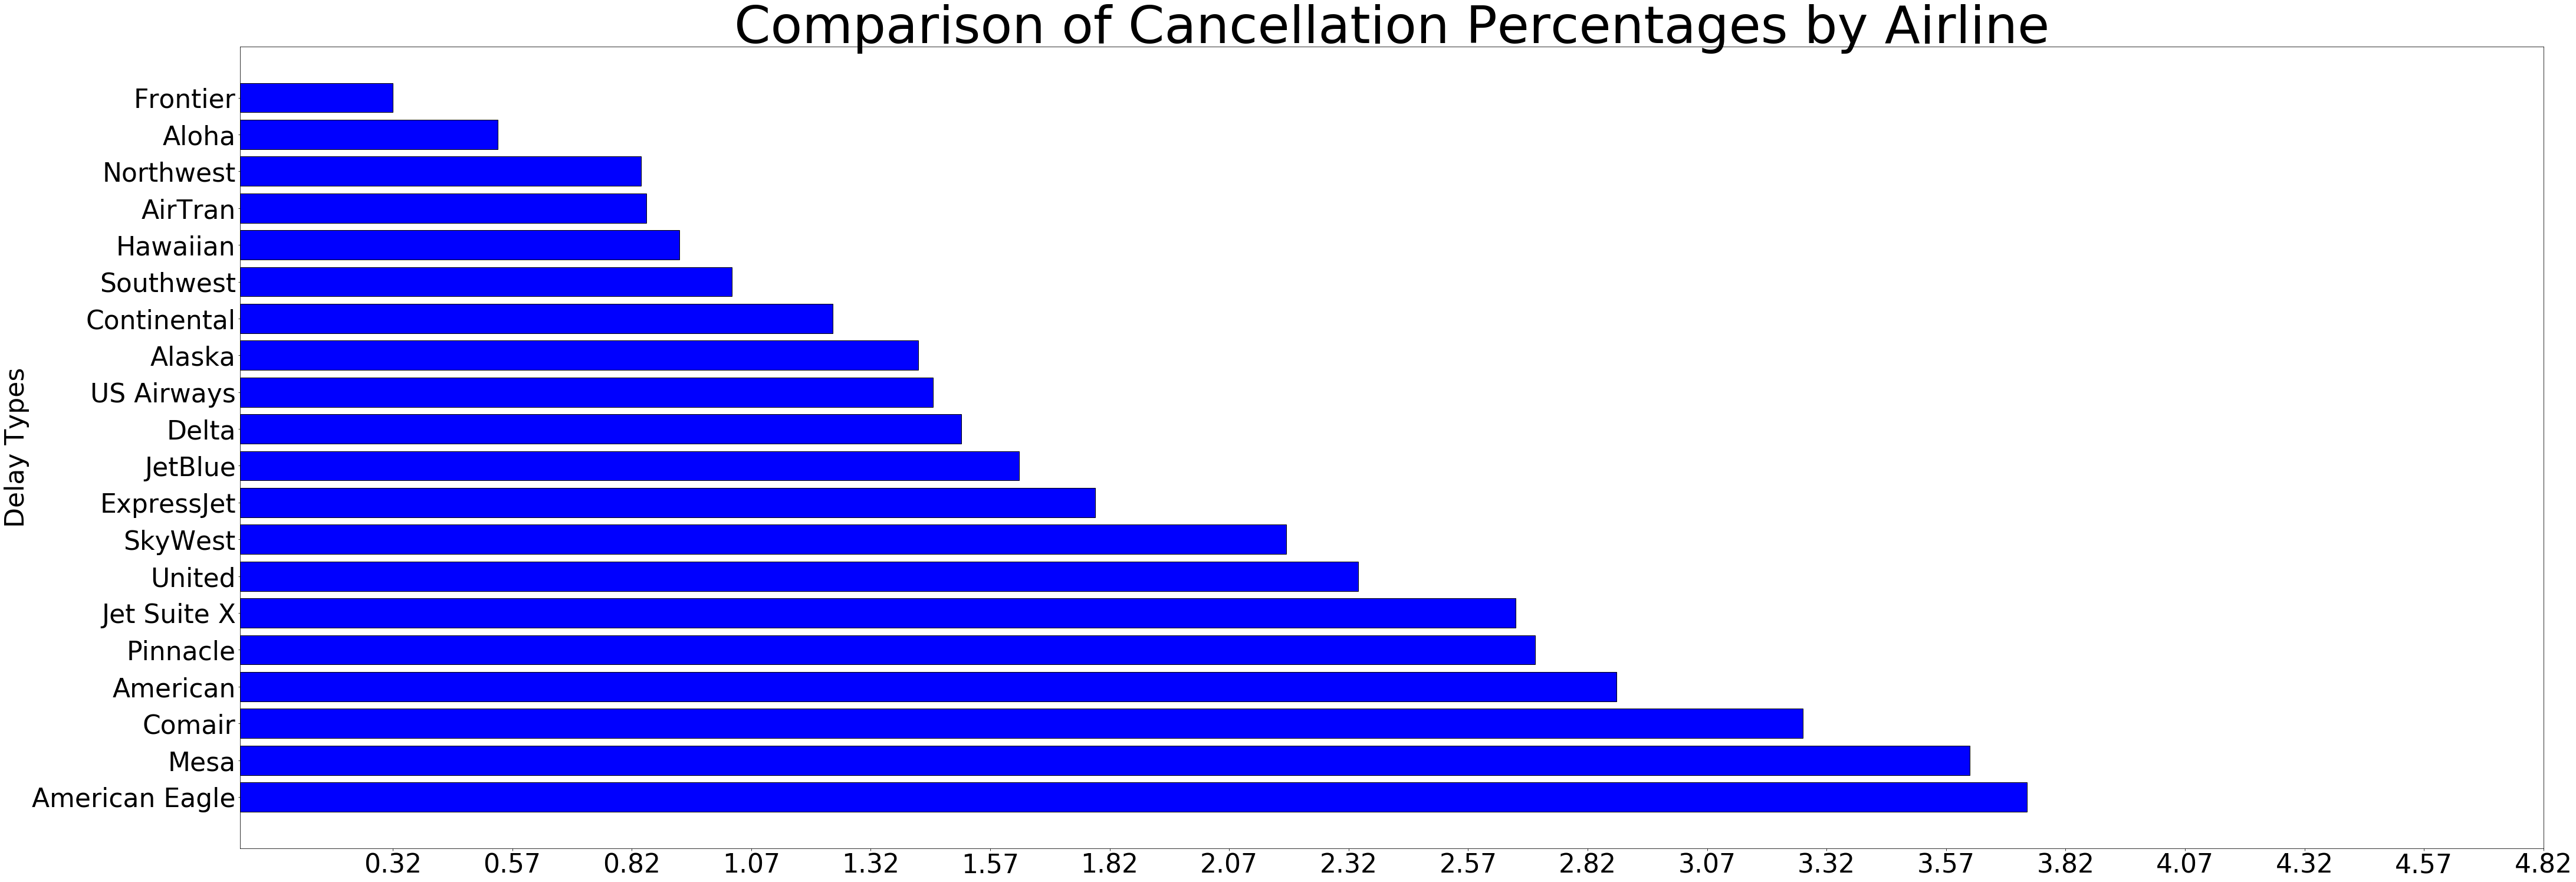

In [17]:
plt.figure(figsize=(70, 25))
array1 = pd_cancelled_stat_by_airline['Airline']
Airline_types=pd.DataFrame(array1)

posy = np.arange(len(Airline_types))
array2 =pd_cancelled_stat_by_airline['Perc']
cancelled_perc = pd.DataFrame(array2)
posx = np.arange(min(array2), 5, .25)

plt.barh(posy,array2,color='blue',edgecolor='black')
plt.yticks(posy, array1, fontsize=44)
plt.ylabel('Delay Types', fontsize=44)
plt.xticks(posx,fontsize=44)

plt.title('Comparison of Cancellation Percentages by Airline',fontsize=88)
plt.show()


### The above table indicates even though other airlines have a better non-cancellaion percentage, Southwest, US Airways and Delta standout for their low cancellation rate despite their huge number of flights.

### An additional observation is that Southwest turns out to be the best in terms of on-time performance and low cancellation rate, despite having the highest volume of flights at roughly one and a quarter million flights. Southwest has always had a great reputation and a very good Wall street performance and the data shows the reason could be solid operational performance. 

## 3. The following is an analysis of the reason for highly delayed flights - arbitrarily defined as being more than an hour late. 

In [18]:
df_big_delay= pd.DataFrame(df[(df['TotDelay'] >60) ])

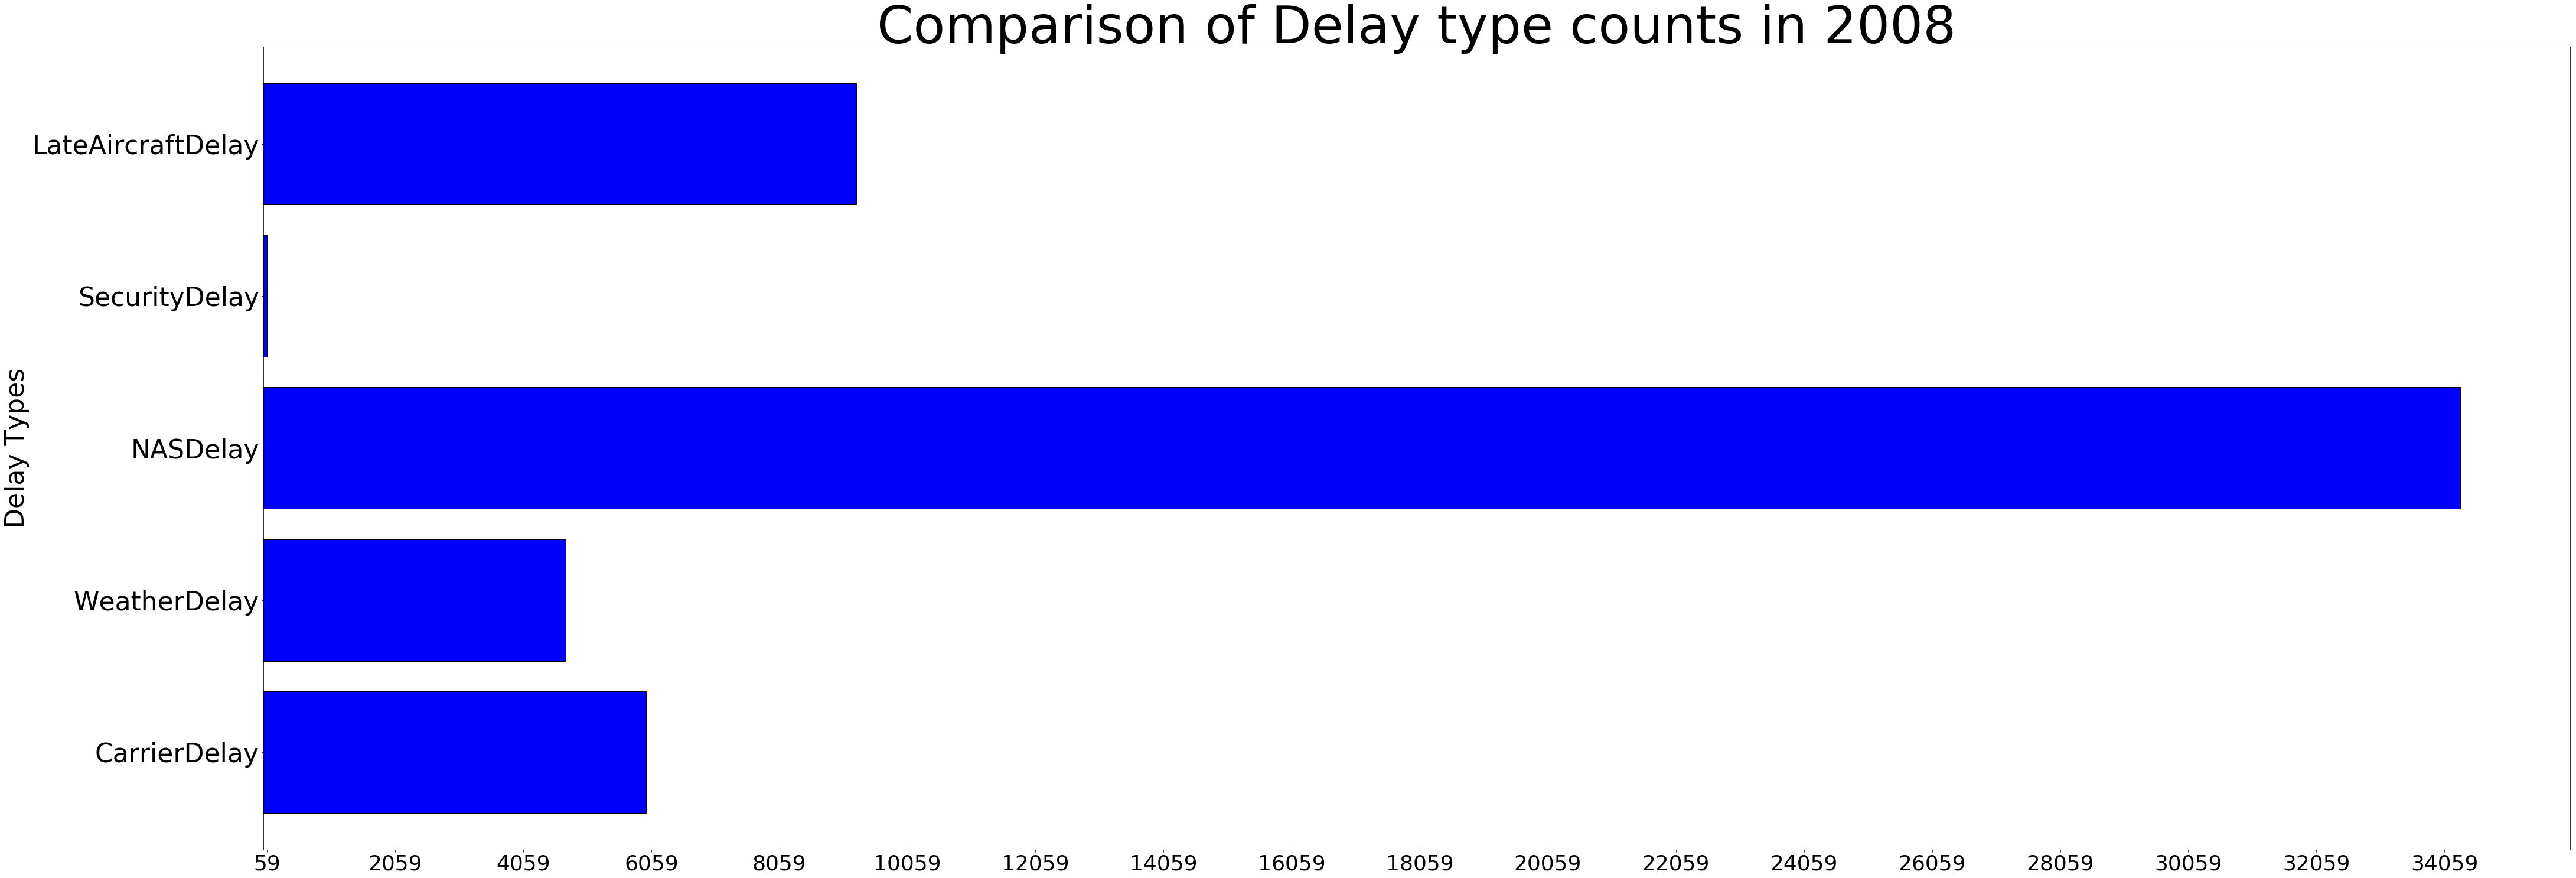

In [19]:
plt.figure(figsize=(70, 25))
array1 = np.array(['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
Delay_types=pd.DataFrame(array1)

posy = np.arange(len(Delay_types))
array2 =np.array([len(df_big_delay[(df_big_delay['CarrierDelay'] >0)]),
len(df_big_delay[(df_big_delay['WeatherDelay'] >0)]),
len(df_big_delay[(df_big_delay['NASDelay'] >0)]),      
len(df_big_delay[(df_big_delay['SecurityDelay'] >0)]),
len(df_big_delay[(df_big_delay['LateAircraftDelay'] >0)])])
Delay_counts = pd.DataFrame(array2)
posx = np.arange(min(array2),max(array2),2000)

plt.barh(posy,array2,color='blue',edgecolor='black')
plt.yticks(posy, array1, fontsize=44)
plt.ylabel('Delay Types',fontsize=44)
plt.xticks(posx,fontsize=36)

plt.title('Comparison of Delay type counts in 2008',fontsize=88)
plt.show()


#### Above graph indicates that major delays such as NASDelay and WeatherDelay for flights delayed by an hour or more are not preventable. So, we shift attention onto LateAircraftDelay and CarrierDelay. Let us see how different airlines fare on this reason.

In [20]:
# The following creates a data frame for flights with 90th percentile of Late Aircraft Delay and Carrier delay
df_big_delay_grp_coded = pd.DataFrame(df_big_delay.groupby('UniqueCarrier')['LateAircraftDelay','CarrierDelay'].quantile(.90).reset_index().sort_values('LateAircraftDelay'))

df_big_delay_grp = pd.merge(df_big_delay_grp_coded, df_al, on='UniqueCarrier')
df_big_delay_grp.sort_values('Airline')

,UniqueCarrier,LateAircraftDelay,CarrierDelay,Airline
17,FL,74.0,4.0,AirTran
5,AS,23.0,7.0,Alaska
12,AA,46.0,10.0,American
16,MQ,69.0,6.0,American Eagle
1,OH,0.0,30.0,Comair
9,CO,32.0,13.0,Continental
10,DL,37.0,21.0,Delta
2,EV,0.0,35.0,ExpressJet
4,F9,17.0,18.7,Frontier
3,HA,9.3,339.6,Hawaiian


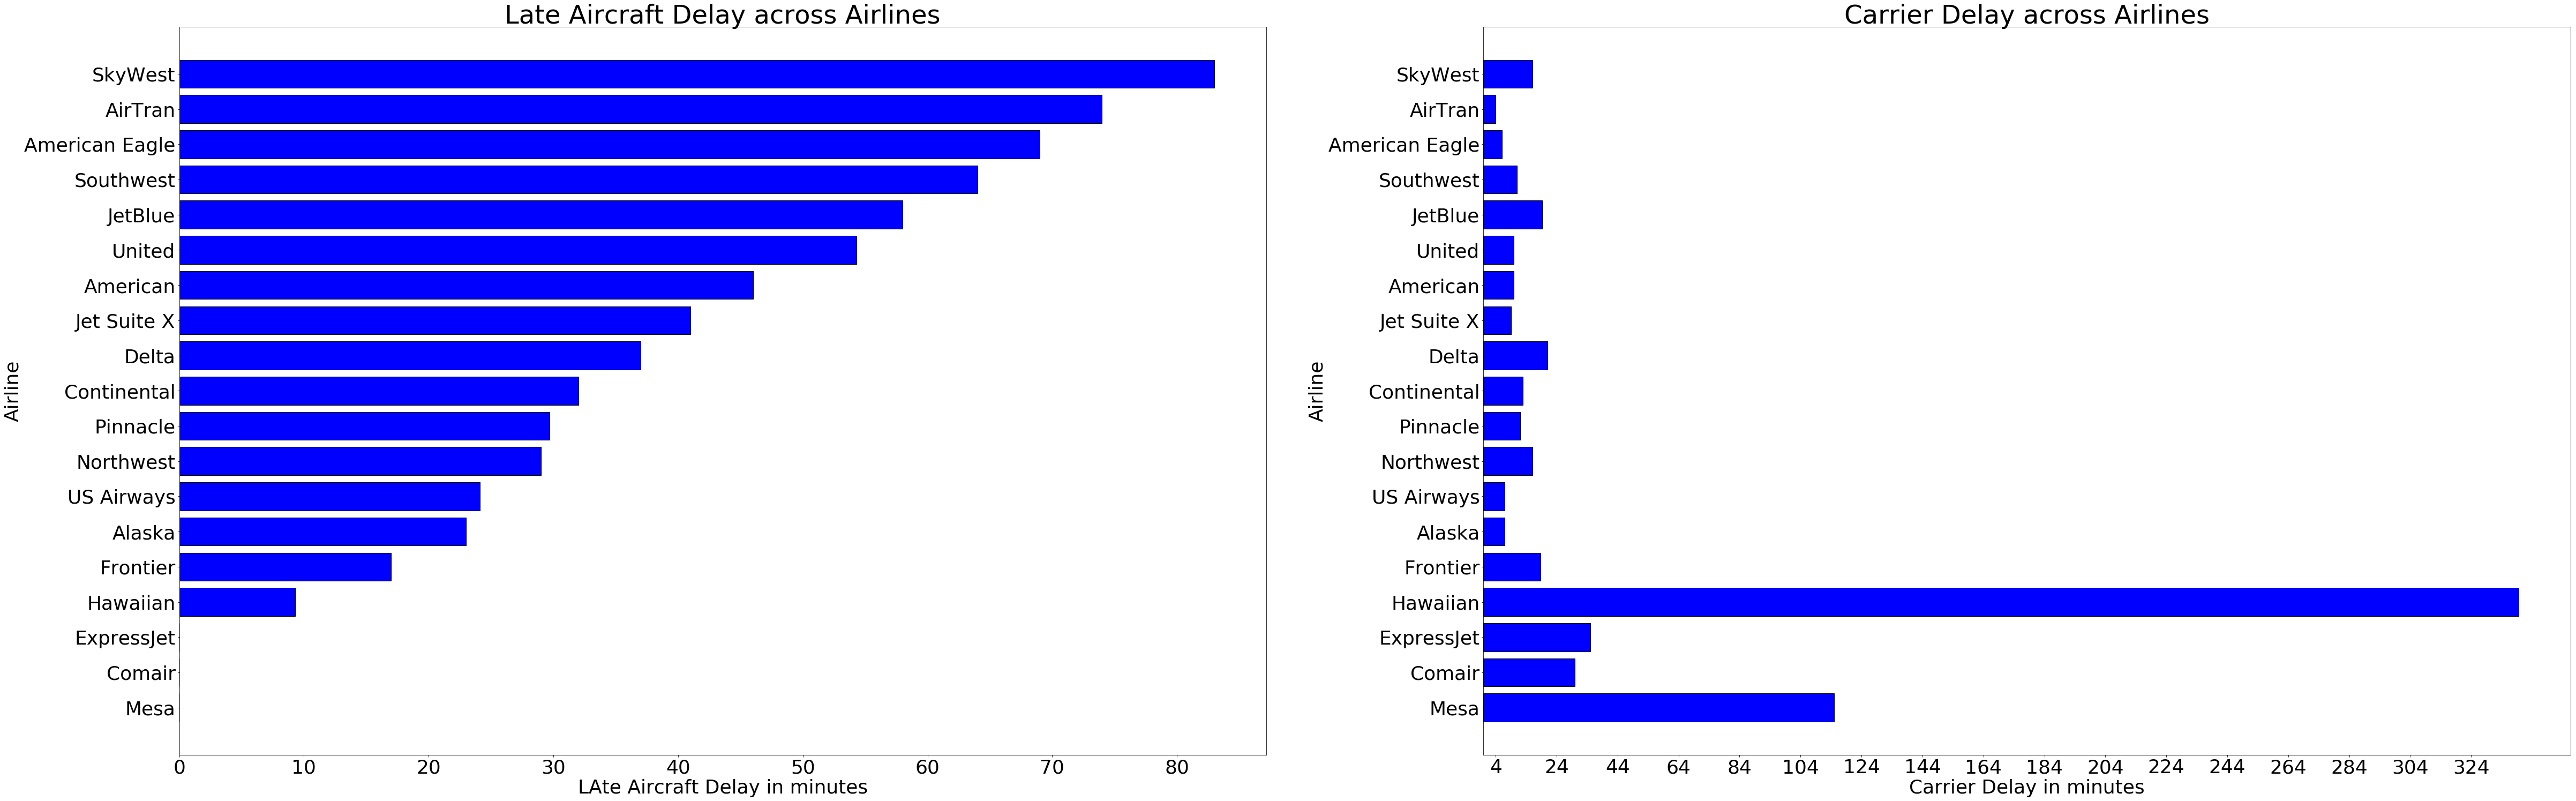

In [21]:
plt.figure(figsize=(80, 25))


Airlines=df_big_delay_grp['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
AircraftDelay=df_big_delay_grp['LateAircraftDelay']
xpos = np.arange(min(AircraftDelay),max(AircraftDelay)+1,10)
 
plt.subplot(1,2,1) 

plt.barh(pos,AircraftDelay,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('LAte Aircraft Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Late Aircraft Delay across Airlines',fontsize=48)


Airlines=df_big_delay_grp['Airline']
ypos = np.arange(len(Airlines))
CarrierDelay=df_big_delay_grp['CarrierDelay']
xpos = np.arange(min(CarrierDelay),max(CarrierDelay)+1,20)
 
plt.subplot(1,2,2)
plt.barh(pos,CarrierDelay,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Carrier Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Carrier Delay across Airlines',fontsize=48)
plt.show()

#### Looking at the graph above, the resuts are a mixed bag. As a class we cannot say whether National/ International airlines are doing better or worse than Regional airlines. Southwest Airlines is middle of the pack! What could be the reason?

#### Let us examine the airlines from a different angle. TailNum indicates a unique aircraft. Let us count how many unique aircrafts each airline has and how long are they kept in air on average and how many flights does each take on average

In [22]:
df_flight_count_byCarrier = pd.DataFrame(df.groupby('UniqueCarrier').count().reset_index())


df_flight_trunc_byCarrier1 = df_flight_count_byCarrier[['UniqueCarrier','Year']] 

df_flight_trunc_byCarrier2 = pd.DataFrame(df.groupby('UniqueCarrier')['TimeInMotion'].sum().reset_index())

df_flight_trunc_byCarrier = pd.DataFrame(pd.merge(df_flight_trunc_byCarrier1,df_flight_trunc_byCarrier2,on='UniqueCarrier'))

In [23]:
df_tailcount_bycarrier = pd.DataFrame(df.groupby(['UniqueCarrier'])['TailNum'].nunique().reset_index())

df_merged = pd.DataFrame(pd.merge(df_tailcount_bycarrier,df_flight_trunc_byCarrier,on='UniqueCarrier'))

df_merged['FlightsPerPlane']= df_merged['Year']/df_merged['TailNum']
df_merged['HoursPerPlane']= df_merged['TimeInMotion']/(60* df_merged['TailNum'])

df_aircraft_stat = pd.DataFrame(pd.merge(df_merged,df_al,on='UniqueCarrier'))

In [24]:
df_aircraft_stat.rename(columns={'TailNum': 'Plane_count'}, inplace=True)
df_aircraft_stat.rename(columns={'Year': 'Flight_count'}, inplace=True)

In [25]:
df_aircraft_stat

,UniqueCarrier,Plane_count,Flight_count,TimeInMotion,FlightsPerPlane,HoursPerPlane,Airline
0,9E,162,262208,24850306.0,1618.567901,2556.615844,Pinnacle
1,AA,656,604885,97715527.0,922.080793,2482.609934,American
2,AQ,21,7800,572361.0,371.428571,454.254762,Aloha
3,AS,126,151102,22743026.0,1199.222222,3008.336772,Alaska
4,B6,154,196091,34251031.0,1273.318182,3706.821537,JetBlue
5,CO,378,298455,54153357.0,789.563492,2387.714153,Continental
6,DL,461,451931,69330478.0,980.327549,2506.524873,Delta
7,EV,163,280575,25811323.0,1721.319018,2639.194581,ExpressJet
8,F9,63,95762,13701065.0,1520.031746,3624.620370,Frontier
9,FL,142,261684,32813549.0,1842.845070,3851.355516,AirTran


### The graphs below indicate potential reason for subpar performance regarding Airline delays(Carrier &  LateAircraft)  for Southwest. 
### Southwest keeps its aircrafts on higher proportion of flights than any other airline and it keeps them for higher proportion of time in air than any other airline. For this reason, any delay of an hour or more, likely disrupts its operations more, thus causing more delays than a few other airlines.
### The scatter and bar plots below illustarte this point more clearly.

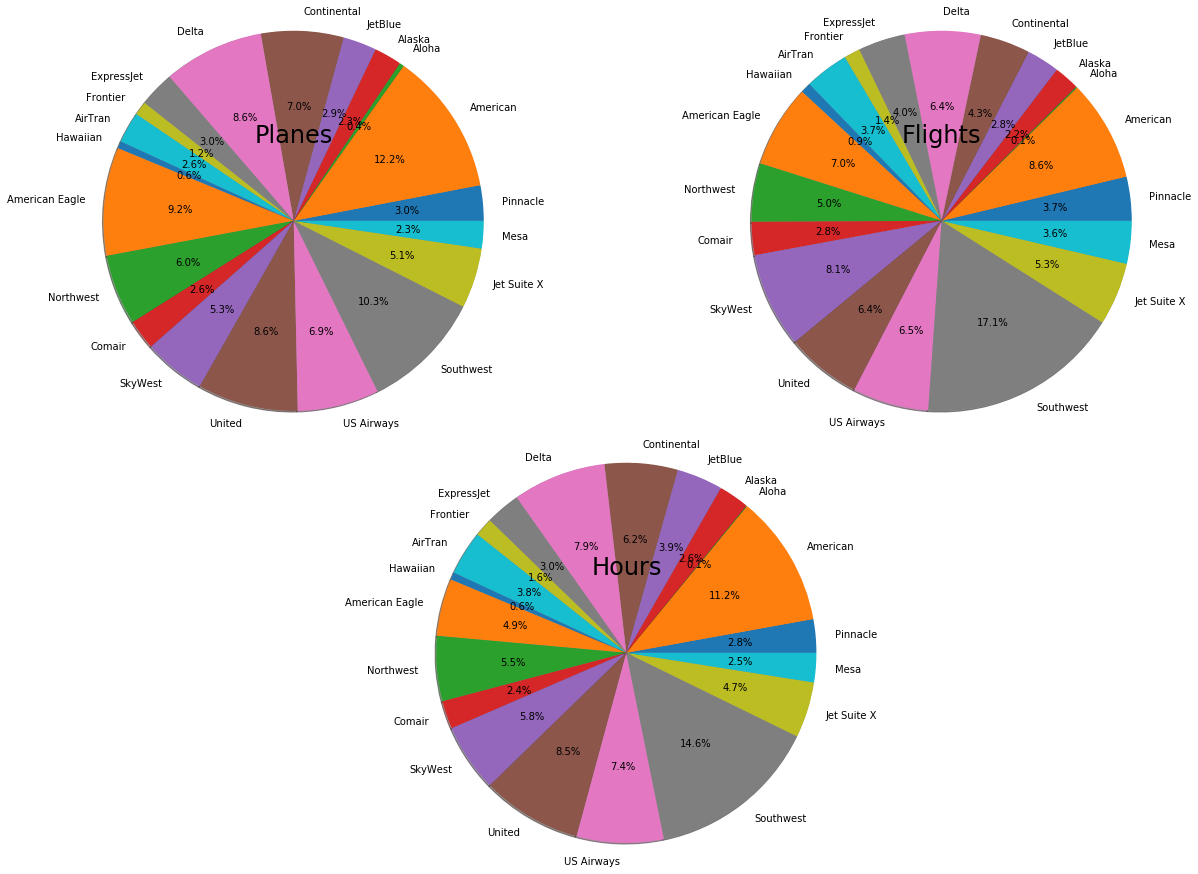

In [26]:
fig = plt.figure()
labels=df_aircraft_stat['Airline']
fracs1 = df_aircraft_stat['Plane_count']
ax1 = fig.add_axes([0, 1.5, .5, .5], aspect=1)
ax1.pie(fracs1, labels=labels, radius = 3.3,autopct='%1.1f%%', shadow=True, startangle=0)
ax1.set_title('Planes',fontsize= 24)

fracs2 = df_aircraft_stat['Flight_count']
ax2 = fig.add_axes([1.5, 1.5, .5, .5], aspect=1)
ax2.pie(fracs2, labels=labels, radius = 3.3,autopct='%1.1f%%', shadow=True, startangle=0)
ax2.set_title('Flights',fontsize= 24)

fracs3 = df_aircraft_stat['TimeInMotion']
ax3 = fig.add_axes([0.77, 0, .5, .5], aspect=1)
ax3.pie(fracs3, labels=labels, radius = 3.3,autopct='%1.1f%%', shadow=True, startangle=0)
ax3.set_title('Hours',fontsize= 24)

plt.show()

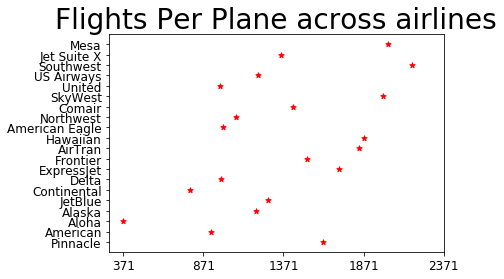

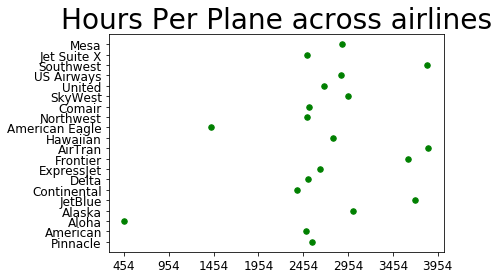

In [36]:
#plt.figure(figsize=(140, 45))

df_aircraft_stat.sort_values('FlightsPerPlane')
Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
#plt.subplot(1,2,1)
useTimes=df_aircraft_stat['FlightsPerPlane']
xpos = np.arange(min(useTimes),max(useTimes)+500,500)
plt.scatter(x=df_aircraft_stat['FlightsPerPlane'],y=df_aircraft_stat['Airline'],s=30,color='red',marker='*')
plt.yticks(ypos, Airlines, fontsize=12)
plt.xticks(xpos,fontsize=12)
plt.title('Flights Per Plane across airlines',fontsize=28)
plt.show()

df_aircraft_stat.sort_values('HoursPerPlane')
#plt.subplot(1,2,2)
plt.scatter(x=df_aircraft_stat['HoursPerPlane'], y=df_aircraft_stat['Airline'],color='green',s=30)
hoursperTail=df_aircraft_stat['HoursPerPlane']
xpos = np.arange(min(hoursperTail),max(hoursperTail)+500,500)
plt.yticks(ypos, Airlines, fontsize=12)
plt.xticks(xpos,fontsize=12)
plt.title('Hours Per Plane across airlines',fontsize=28)
plt.show()

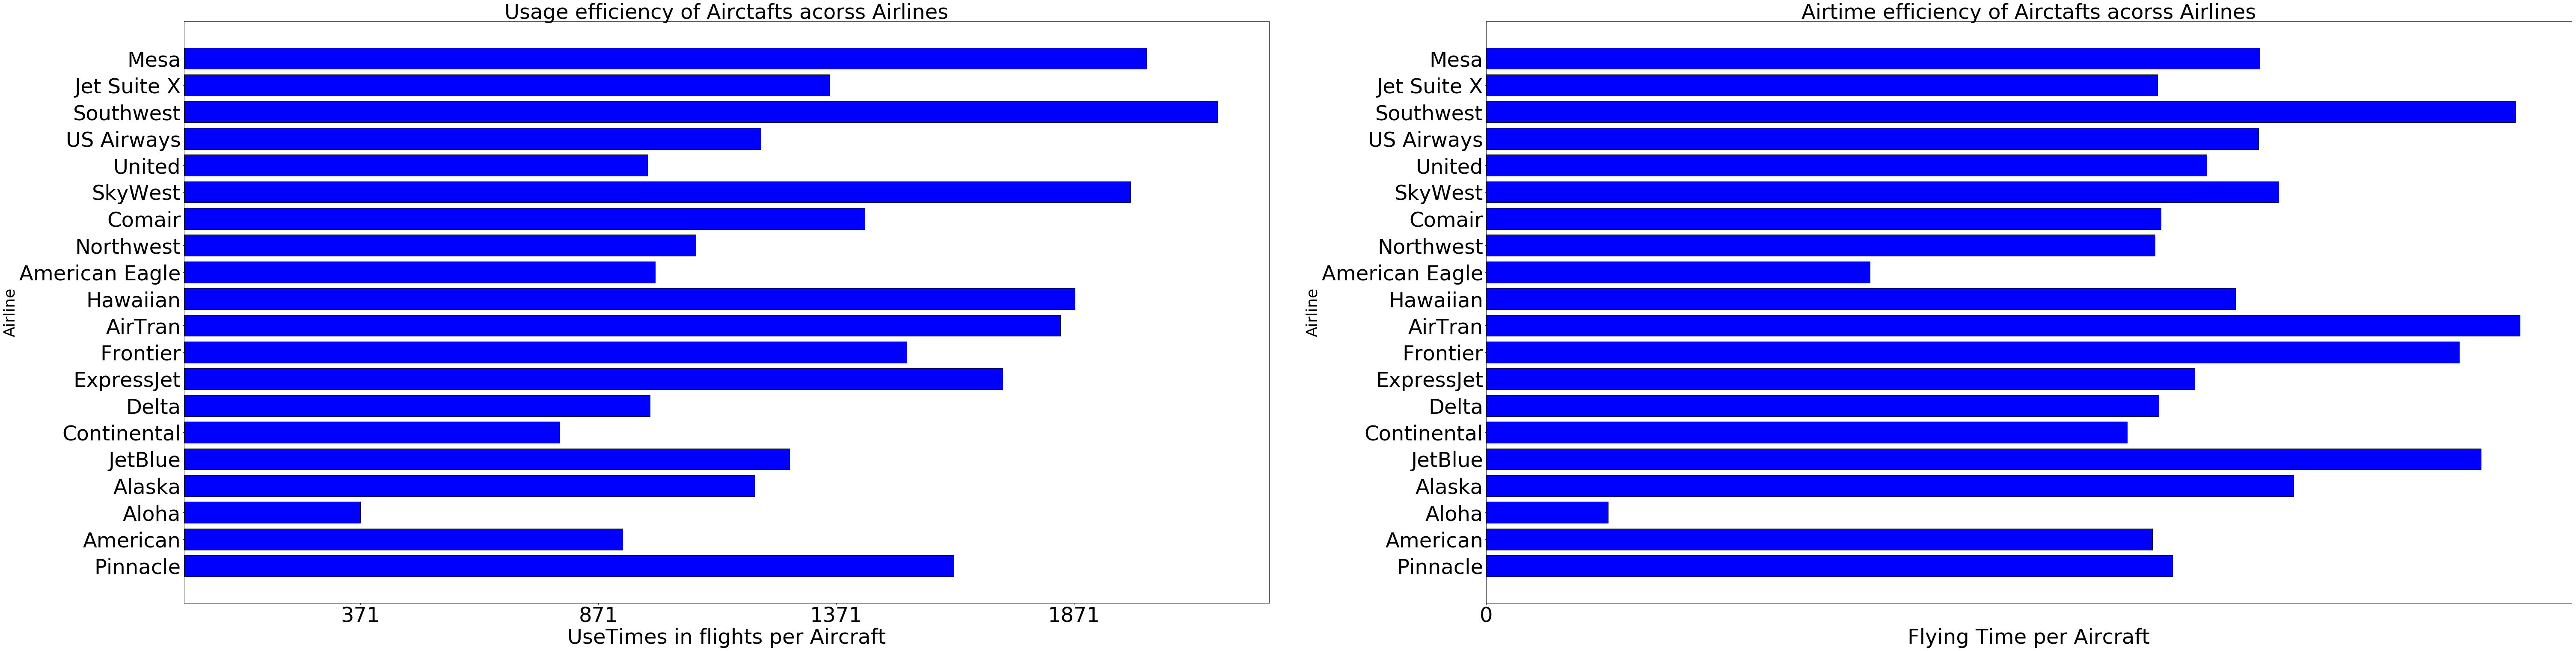

In [28]:
plt.figure(figsize=(100, 25))
df_aircraft_stat.sort_values('Airline')
Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
useTimes=df_aircraft_stat['FlightsPerPlane']
xpos = np.arange(min(useTimes),max(useTimes)+1,500)
 
plt.subplot(1,2,1) 

plt.barh(pos,useTimes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=48)
plt.xlabel('UseTimes in flights per Aircraft', fontsize=48)
plt.ylabel('Airline', fontsize=36)
plt.title('Usage efficiency of Airctafts acorss Airlines',fontsize=48)


Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
hoursperTail=df_aircraft_stat['HoursPerPlane']
xpos = np.arange(min(hoursperTail)/1000,max(hoursperTail)/1000+1,500)
 
plt.subplot(1,2,2)
plt.barh(pos,hoursperTail,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=48)
plt.xlabel('Flying Time per Aircraft', fontsize=48)
plt.ylabel('Airline', fontsize=36)
plt.title('Airtime efficiency of Airctafts acorss Airlines',fontsize=48)
plt.show()

## A comparison that would be interesting is the analysis of airlines based on the distance traveled in each leg and find statistics based on total airline miles rather than total flights.
## Another analysis I would like to do is how the same tail number is used in a given day, month etc.,
## I would like to do analysis across the years to study improvement in performance among different airlines, but I am limited by storage and processing power